In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from skimage import exposure, color, measure
from ipywidgets import interact

In [2]:
%matplotlib widget

<IPython.core.display.Javascript object>


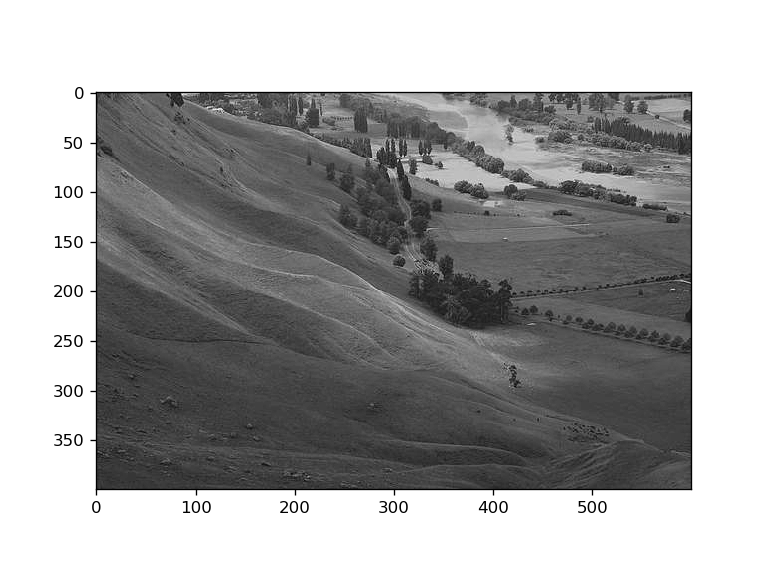

In [3]:
pic = plt.imread("600px-Unequalized_Hawkes_Bay_NZ.jpg")
plt.figure()
plt.imshow(pic, cmap='gray')

<IPython.core.display.Javascript object>


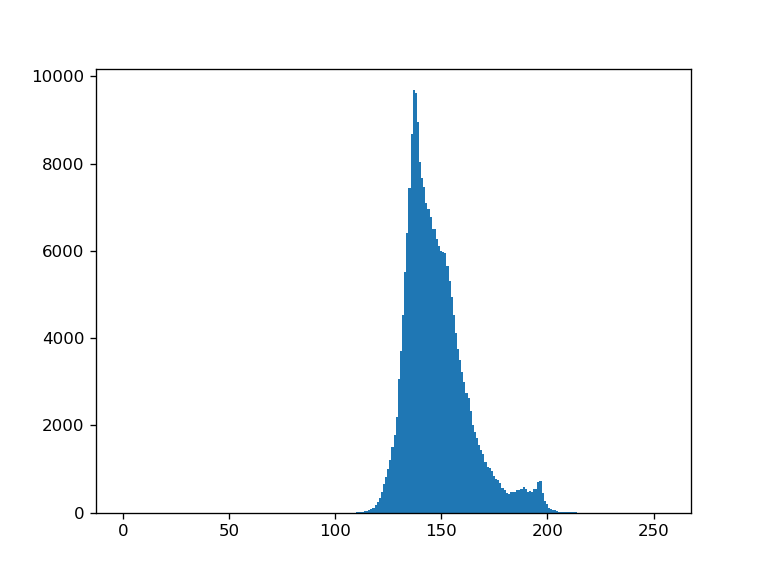

In [4]:
plt.figure()
x = plt.hist(pic.ravel(), bins=256, range=(0,255))

<IPython.core.display.Javascript object>


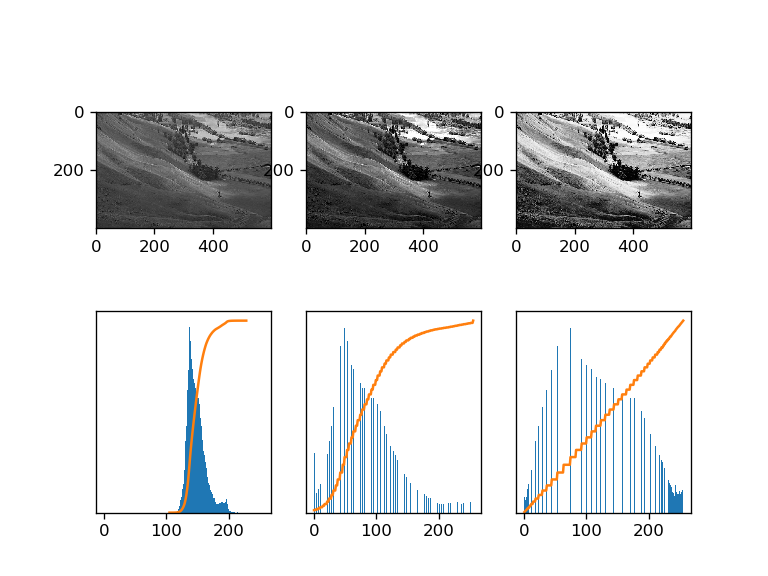

[]

In [5]:
p2, p98 = np.percentile(pic, (1, 99))
stretch = exposure.rescale_intensity(pic, in_range=(p2, p98))
eq = exposure.equalize_hist(pic)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(pic, cmap='gray')
ax[0,1].imshow(stretch, cmap='gray')
ax[0,2].imshow(eq, cmap='gray')
x = ax[1,0].hist(pic.ravel(), bins=256, range=(0,255))
img_cdf, bins = exposure.cumulative_distribution(pic, 256)
ax[1,0].plot(bins, img_cdf*10000)
x = ax[1,1].hist(stretch.ravel(), bins=256, range=(0,255))
img_cdf, bins = exposure.cumulative_distribution(stretch, 256)
ax[1,1].plot(bins, img_cdf*10000)
x = ax[1,2].hist(eq.ravel()*256, bins=256, range=(0,255))
img_cdf, bins = exposure.cumulative_distribution(eq*256, 256)
ax[1,2].plot(bins, img_cdf*10000)

ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[1,2].set_yticks([])

<IPython.core.display.Javascript object>


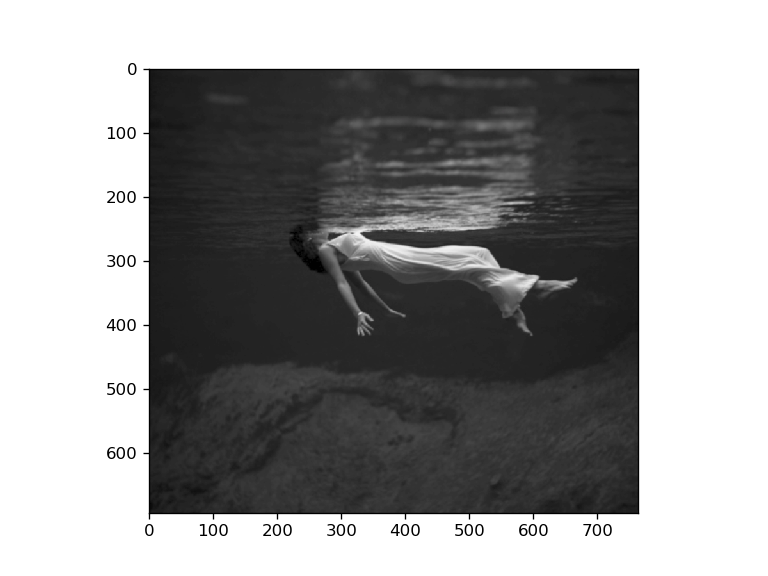

interactive(children=(FloatSlider(value=1.0, description='gamma', max=2.0, min=0.1), Output()), _dom_classes=(…

<function __main__.gammaAdjust(gamma=1.0)>

In [6]:
water = plt.imread("waterytart.png")
plt.figure()
def gammaAdjust(gamma=1.0):
    plt.imshow(exposure.adjust_gamma(water, gamma))

interact(gammaAdjust, gamma=(0.1, 2))

In [ ]:
turtle = plt.imread("turtle.png")[:,:, 0:3]
turtle = measure.block_reduce(turtle, (2,2,1), np.max)
plt.figure()

def hueAdjust(degreeShift=0):
    turtle_hsv = color.rgb2hsv(turtle)
    turtle_hsv[:,:,0] += degreeShift / 360
    turtle_hsv[:,:,0] = turtle_hsv[:,:,0] % 1

    plt.imshow(color.hsv2rgb(turtle_hsv))

interact(hueAdjust, degreeShift=(0,359,10))